# NORMALIZACIÓN, SELECCIÓN DE CARACTERÍSTICAS Y REDUCCIÓN DE LA DIMENSIONALIDAD (PCA)

## Conjunto de datos Iris

El conjunto de datos Iris es una de las bases de datos más conocida en la literatura sobre reconocimiento de patrones. Contiene tres clases de 50 instancias cada una, cada una de las cuales se refiere a un tipo de planta iris. Dentro de este conjunto de datos, una clase es linealmente separable de las otras dos; estas últimas no lo son entre sí.
Información de atributos:
1. longitud del sépalo en cm
2. anchura del sépalo en cm
3. longitud del pétalo en cm
4. anchura del pétalo en cm
5. clase:
*   Iris Setosa
*   Iris Versicolor
*   Iris Virginica

https://archive.ics.uci.edu/ml/datasets/iris

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data



Los humanos percibimos intuitivamente los datos en espacios bidimensionales y tridimensionales, y la representación tetradimensional de los datos del iris se considera un dato de alta dimensión. Al usar datos de alta dimensión, el entrenamiento y la predicción completa de objetos sin duda incrementará el coste de ejecución del algoritmo. Además, no todas las características son beneficiosas para la predicción, y aquellas irrelevantes o redundantes perjudicarán dicha predicción.

Mostremos la distribución de los datos según la longitud y el ancho del sépalo:

Text(0, 0.5, 'Sepal width')

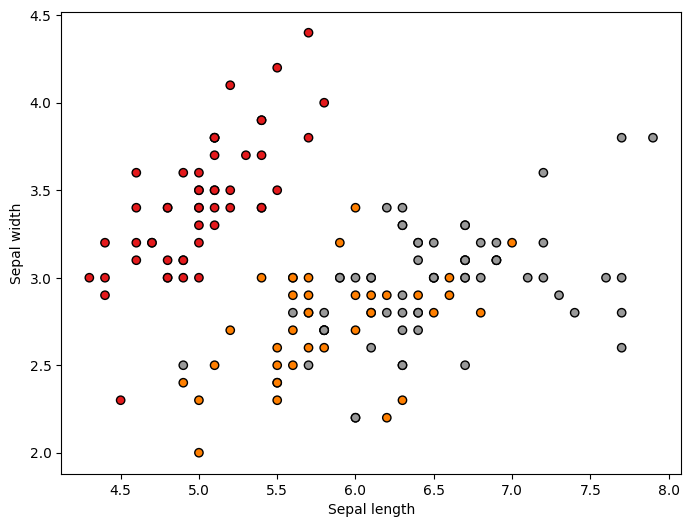

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

# Mostrar la distribucion de los datos utilizando la longitud y el ancho del sepalo
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k") # Seleccionamos las dos primeras caracteristicas (longitud del sepalo y ancho del sepalo)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")




##Preprocesamiento de datos

Se recomienda normalizar los datos previamente cuando los valores se miden en diferentes escalas. La normalización implica ajustar los valores medidos en diferentes escalas a una escala teóricamente común.

Existen varias posibilidades de normalización. Una posibilidad es usar *StandardScaler* para estandarizar las características del conjunto de datos a escala unitaria (media = 0 y varianza = 1).

Text(0, 0.5, 'Sepal width')

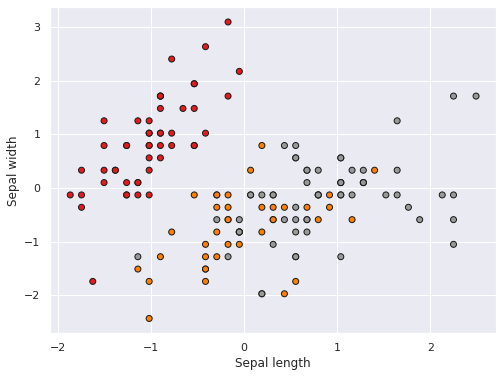

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

# Mostrar la distribucion de los datos escalados utilizando la longitud y el ancho del sepalo
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

Como se muestra, la distribución es la misma, pero los valores son diferentes.

Otra posible normalización consiste en realizar el siguiente cálculo:

\begin{align}
X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}}
\end{align}

donde $X_{max}$ y $X_{min}$ representan los valores máximo y mínimo del conjunto donde se encuentra $X$, y el resultado del cálculo es cambiar el número al número decimal entre $[0, 1]$, lo cual es conveniente para la agrupación posterior.

## Procesamiento de dimensión reducida
Ahora mostremos la distribución de los datos según la longitud del sépalo y el pétalo:

Text(0, 0.5, 'Petal length')

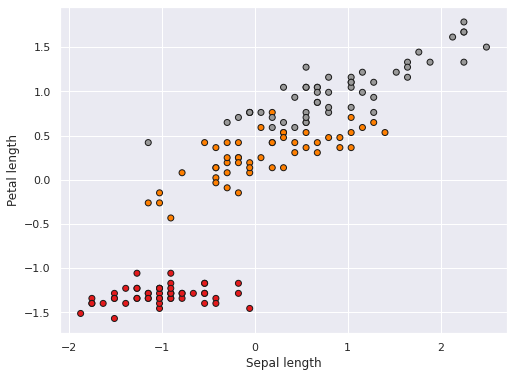

In [ ]:

# Mostrar la distribucion de los datos escalados utilizando la longitud del sepalo y del petalo
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(x_scaled[:, 0], x_scaled[:, 2], c=y, cmap=plt.cm.Set1, edgecolor="k") # Seleccionamos las caracteristicas 0 y 2 (longitud del sepalo y longitud del petalo)
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

Como se muestra, el par de atributos {Longitud del sépalo, Longitud del pétalo} parece más adecuado que el par {Longitud del sépalo, Anchura del sépalo} para agrupar los datos.

El algoritmo de Análisis de Componentes Principales (Principal Component Analysis, PCA) transforma el espacio de coordenadas para que los datos expresen la mayor cantidad de características con menos dimensiones. El objetivo de la reducción de dimensión es conservar algunas características importantes y eliminar el ruido y las características irrelevantes, mejorando así la velocidad de procesamiento de datos, reduciendo así la complejidad computacional y la dificultad de análisis en el proceso de análisis de datos de alta dimensión.

Por ejemplo, podemos proyectar datos 4-dimensionales a 2-dimensionales:

Text(0, 0.5, 'Second principal component')

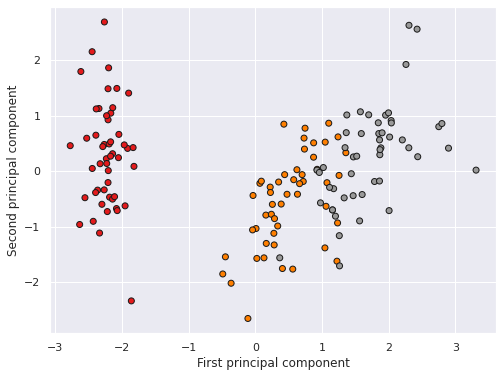

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_scaled_pca = pca.fit_transform(x_scaled)

# Mostrar la distribucion de los datos escalados despues del PCA
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(x_scaled_pca[:, 0], x_scaled_pca[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")



La varianza explicada indica cuánta información (varianza) puede atribuirse a cada una de las componentes principales. Esto es importante, ya que, si bien se puede convertir un espacio 4-dimensional a 2-dimensional, se pierde parte de la varianza (información) al hacerlo.

In [ ]:
pca.explained_variance_ratio_
print(f'The first principal component contains {pca.explained_variance_ratio_[0]*100:.2f}% of the variance (information)')
print(f'The second principal component contains {pca.explained_variance_ratio_[1]*100:.2f}% of the variance')
print(f'Together, the two components contain {(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])*100:.2f}% of the variance')

The first principal component contains 72.96% of the variance (information)
The second principal component contains 22.85% of the variance
Together, the two components contain 95.81% of the variance


En lugar de proporcionar el número de componentes principales, es mejor dejar que PCA elija el número mínimo de componentes principales para que se conserve un cierto porcentaje de la varianza.

In [ ]:
pca = PCA(0.95) # Se conserva el 95% de la varianza
x_scaled_pca = pca.fit_transform(x_scaled)